> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [356]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### <a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

### Reading the Data:

In [357]:
df = pd.read_csv('tmdb-movies.csv')
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


### Printing the Data's data type

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [359]:
# Display the number of missing values for each column .
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [360]:
# explore the dulicated items .
df.duplicated().sum()

1

In [361]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


### it's okay to keep the dublicated values

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 ( What's the most popular genres over years? )


### summary statistics

In [362]:
# Display summary statistics for the dataset
df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


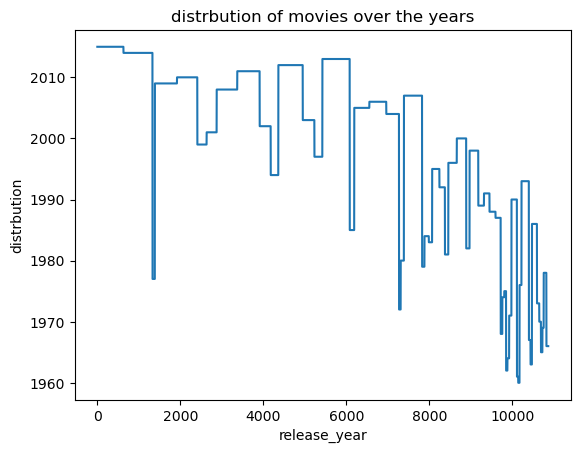

In [363]:
df.release_year.plot(kind='line',x= "distrbution",y= "release_year");
plt.title('distrbution of movies over the years')
plt.xlabel("release_year")
plt.ylabel("distrbution");

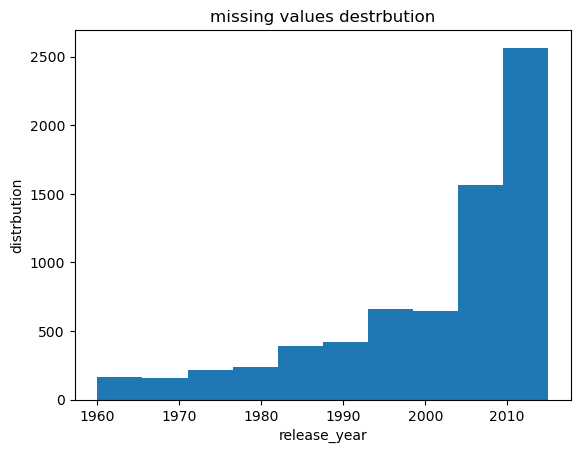

In [364]:
# Missing values distrbution in (revenue,budget,runtime) across the years

zero=df[(df.revenue == 0)|(df.budget == 0)|(df.runtime == 0)]
zero.release_year.plot(kind='hist');
plt.title('missing values destrbution')
plt.xlabel("release_year")
plt.ylabel("distrbution");

### what is the count of each movie genres & cast

In [365]:
display(df.genres.value_counts())
print('-'*50)
display(df.cast.value_counts())

Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Adventure|Animation|Romance                   1
Family|Animation|Drama                        1
Action|Adventure|Animation|Comedy|Family      1
Action|Adventure|Animation|Fantasy            1
Mystery|Science Fiction|Thriller|Drama        1
Name: genres, Length: 2039, dtype: int64

--------------------------------------------------


Louis C.K.                                                                        6
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei           5
Bill Burr                                                                         4
Aziz Ansari                                                                       3
Elijah Wood|Ian McKellen|Viggo Mortensen|Liv Tyler|Orlando Bloom                  3
                                                                                 ..
Ray Stevenson|Vincent D'Onofrio|Val Kilmer|Christopher Walken|Linda Cardellini    1
Freida Pinto|Riz Ahmed|Roshan Seth|Kalki Koechlin|Anurag Kashyap                  1
William Hurt|Paul Giamatti|James Woods|Billy Crudup|Topher Grace                  1
Dennis Quaid|Tony Oller|Aimee Teegarden|Stephen Lunsford|Devon Werkheiser         1
Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson          1
Name: cast, Length: 10719, dtype: int64

In [366]:
max(df.cast.value_counts())

6

### drop any missing values

In [367]:
df.dropna(inplace = True)

### drop zero values

In [368]:
zero_data = df[(df.revenue_adj == 0)|(df.budget_adj == 0)|(df.runtime == 0)]
df.drop(zero_data.index,inplace=True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [369]:
# Descriptive statistics for cleaned dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1287.000000,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03,1.287000e+03
mean,52557.491064,1.786022,5.200349e+07,1.762444e+08,110.273504,947.266511,6.279487,2007.017094,5.462994e+07,1.991775e+08
std,74450.077163,2.172137,5.514540e+07,2.538156e+08,18.811369,1255.476215,0.795955,8.060503,5.525463e+07,2.968515e+08
min,11.000000,0.010335,1.000000e+00,4.300000e+01,63.000000,10.000000,2.200000,1961.000000,9.693980e-01,4.300000e+01
25%,5851.500000,0.664783,1.400000e+07,2.565097e+07,97.000000,179.000000,5.800000,2005.000000,1.519180e+07,2.764890e+07
50%,20178.000000,1.152354,3.200000e+07,8.208716e+07,107.000000,439.000000,6.300000,2009.000000,3.556927e+07,8.674770e+07
75%,62209.500000,2.125342,7.000000e+07,2.140694e+08,121.000000,1173.000000,6.800000,2011.000000,7.630125e+07,2.351178e+08
max,333348.000000,32.985763,4.250000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


### 4.Sorting release date into decades for Exploratory analysis by using pd.cut() function.

In [370]:
bins_edges=[1960,1970,1980,1990,2000,2010,2015]
bins_names=['1960s','1970s','1980s','1990s','2000s','2010s']
df.release_year = pd.cut(df.release_year, bins_edges, labels = bins_names)
df.release_year.value_counts()

2000s    656
2010s    472
1990s     95
1980s     35
1970s     21
1960s      8
Name: release_year, dtype: int64

### 5.Seperate Data contained in Cast & Genres into Multiple values

In [371]:
def seprate_values(col):
    new_cols=(df[col].str.split('|', expand=True).rename(columns=lambda x: f"{col}_{x+1}"))
    return new_cols

In [372]:
df_genres = seprate_values('genres')

In [373]:
df_cast = seprate_values('cast')

In [374]:
df['cast'],df['genres']=df_cast['cast_1'],df_genres['genres_1']

In [375]:
display(df['cast'].value_counts().nlargest(10))
print('-'*60)
display(df['genres'].value_counts().nlargest(10))

Tom Hanks         13
Matt Damon        13
Mark Wahlberg     13
Nicolas Cage      13
Tom Cruise        12
George Clooney    11
Johnny Depp       11
Ben Affleck       10
Hugh Jackman      10
Steve Carell      10
Name: cast, dtype: int64

------------------------------------------------------------


Drama              274
Action             238
Comedy             230
Adventure          130
Horror              78
Thriller            58
Animation           55
Crime               52
Fantasy             44
Science Fiction     38
Name: genres, dtype: int64

In [376]:
df.groupby(["release_year","genres"])['popularity'].size().unstack()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,
1960s,2,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1970s,2,7,0,2,0,0,5,0,0,0,5,0,0,0,0,0,0,0
1980s,7,16,0,2,0,0,2,0,1,0,3,0,0,0,3,1,0,0
1990s,17,9,4,13,4,0,23,3,4,1,3,0,2,4,3,5,0,0
2000s,110,56,28,144,22,10,150,8,25,3,41,2,4,13,15,21,2,2
2010s,100,38,23,67,26,4,94,8,14,2,26,1,5,9,17,31,6,1


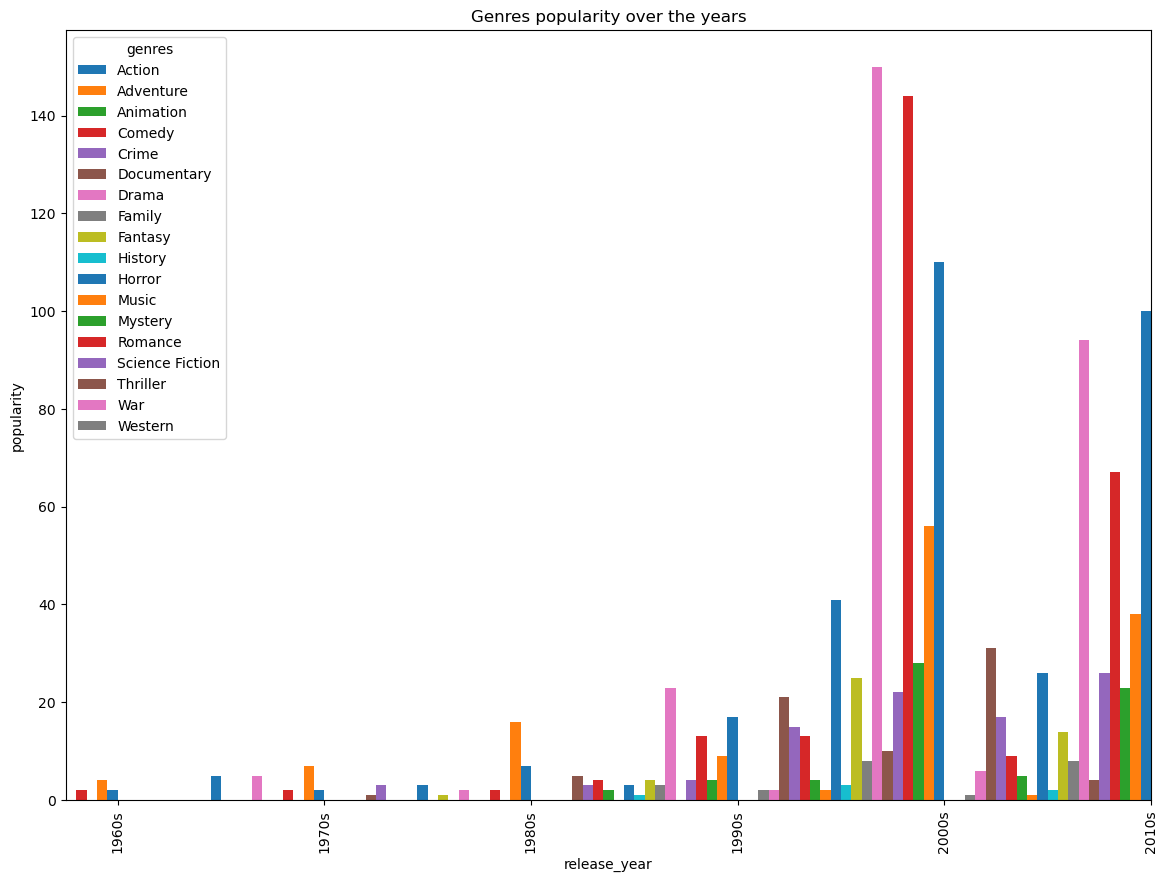

In [387]:
fig, ax = plt.subplots(figsize=(14,10))
df.groupby(["release_year","genres"])['popularity'].size().unstack().plot(kind='bar',ax=ax,width=-.9,align='edge',title = 'Genres popularity over the years');
ax.set_ylabel('popularity');

The Top Three Genres for each decade are:

+ 1960s: Adventure, Action, Comdey.

+ 1970s: Drama, Action, Horror, comdey.

+ 1980s: Comdey, Drama, Action.

+ 1990s: Drama, Comdey, Action.

+ 2000s: Drama, Comdey, Action.

+ 2010s: Drama, Comdey, Action.

### Research Question 2  (Which Genres have The Highest average Revenue over Decades?)

In [378]:
pd.pivot_table(df,index="release_year",columns="genres",values='revenue_adj',aggfunc=pd.Series.mean)

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,
1960s,6.455884e+08,6.930339e+08,NaN,1.810679e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970s,4.127977e+08,9.646533e+08,NaN,4.643701e+08,NaN,NaN,7.732088e+08,NaN,NaN,NaN,5.097712e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980s,9.065979e+07,4.721432e+08,NaN,4.343464e+08,NaN,NaN,3.194221e+08,NaN,6.196634e+08,NaN,3.986553e+07,NaN,NaN,NaN,6.618831e+08,1.741984e+08,NaN,NaN
1990s,1.896920e+08,6.601854e+08,5.639794e+08,1.343173e+08,1.447832e+08,NaN,2.572276e+08,6.942527e+08,1.730384e+08,1.960861e+08,1.786824e+08,NaN,2.730498e+07,3.685544e+08,1.004535e+08,1.589269e+08,NaN,NaN
2000s,1.860770e+08,4.464922e+08,3.881480e+08,1.064945e+08,7.311983e+07,2.447836e+07,9.768604e+07,2.795444e+08,3.022301e+08,1.013229e+08,8.172580e+07,3.796679e+07,4.932263e+07,1.068541e+08,2.057858e+08,1.797027e+08,1.353780e+07,9.682007e+07
2010s,3.108455e+08,3.478543e+08,3.425381e+08,8.878601e+07,9.550094e+07,3.522698e+07,7.542016e+07,2.666794e+08,2.630345e+08,1.632824e+08,6.864986e+07,1.458037e+08,9.309220e+07,1.007281e+08,4.027925e+08,8.286669e+07,2.268953e+08,4.903142e+08


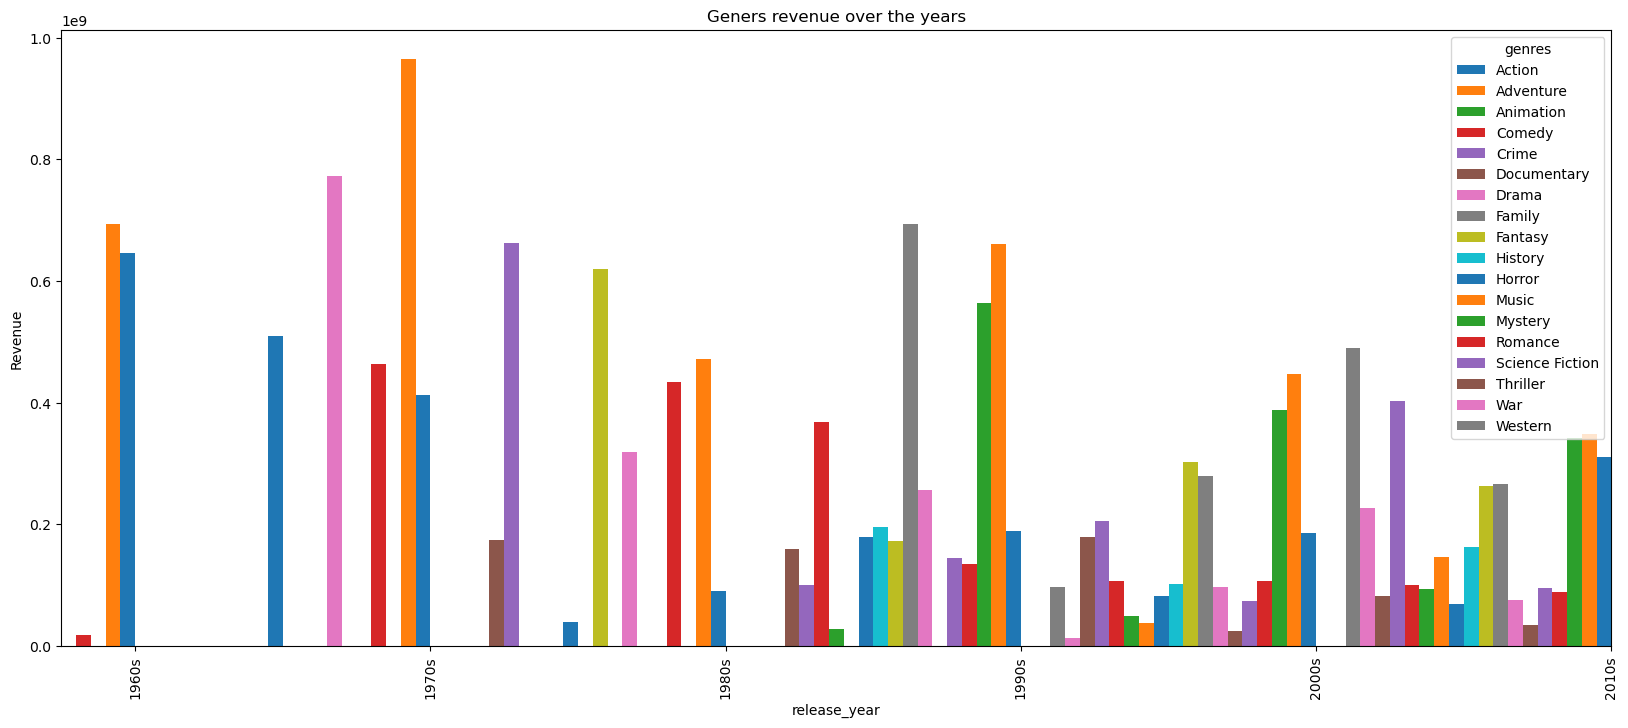

In [389]:
fig, ax = plt.subplots(figsize=(20,8))
pd.pivot_table(df,index="release_year",columns="genres",values='revenue_adj',aggfunc=pd.Series.mean).\
plot(kind='bar',ax=ax,width=-.9,align='edge', title = 'Geners revenue over the years');
ax.set_ylabel('Revenue');

<a id='conclusions'></a>
## Conclusions
## 1. Data Limitations 
    Although our dataset contains more than 10,000 rows it's pretty insufficient to draw precise conclusions :

    1. Most of the data columns are irrelevant for the analysis

    2. many NAN values are missing from our dataset for an uncertain reason (We should try a better web scrapping for a better data quality or prepare data from a different source).


## Conclusive Insights from our Analysis based on our cleaned data
  1. Interest in movie genres varies overtime period.
  2. revenue for each genres changes overtime period